<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Crime-data-analysis-module---Reclaim-The-Night-Leeds-(RTNL)" data-toc-modified-id="Crime-data-analysis-module---Reclaim-The-Night-Leeds-(RTNL)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Crime data analysis module - Reclaim The Night Leeds (RTNL)</a></span><ul class="toc-item"><li><span><a href="#Disclaimer-and-introduction" data-toc-modified-id="Disclaimer-and-introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Disclaimer and introduction</a></span></li><li><span><a href="#Tutorial" data-toc-modified-id="Tutorial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tutorial</a></span><ul class="toc-item"><li><span><a href="#Importing" data-toc-modified-id="Importing-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Importing</a></span></li><li><span><a href="#Initialisation" data-toc-modified-id="Initialisation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Initialisation</a></span></li><li><span><a href="#exporting-the-constituincies" data-toc-modified-id="exporting-the-constituincies-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>exporting the constituincies</a></span></li><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Correct-localisation-points" data-toc-modified-id="Correct-localisation-points-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Correct localisation points</a></span></li><li><span><a href="#Plot-the-hotspots-as-a-barchart" data-toc-modified-id="Plot-the-hotspots-as-a-barchart-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Plot the hotspots as a barchart</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Crime data analysis module - Reclaim The Night Leeds (RTNL)

## Disclaimer and introduction

This Jupyter Notebook demonstrates how to use the crime data analysis module produced by RTNL to identify crime hotspots in UK parlimentary constituincies. It is an early beta version of the module so there are many missing features. To suggest new features or to report a bug please create an issue on the github https://github.com/Reclaim-The-Night-Leeds/crime-hotspots-uk.

The use of data produced by this program is not necessarily endorsed by RTNL. Using this program does not mean we endorse you, your organisation or your aims. We are more than welcome to recieve requests to collaborate on projects and to spread information if we deem it in line with our aims. To work with us please contact RTNLeeds [at] gmail.com

We welcome pull requests and contributions from anyone who wishes to expand the capacity of the module

## Tutorial
The rest of this notebook is dedicated to explaining how to use the module and demonstrating its capabillities.

### Importing
The module itself is pubplished on pypy as chuk and can be imported installed with this command

In [13]:
!pip install chuk

Once installed import with this

In [1]:
import chuk

### Initialisation
The main class of the module is crime.Data() and it's init function takes two compulsory arguments.
* name: The name to display at the top of graphs and reports produced
* location_names: a list of constituincy names used to find the constituincies to get data for

In [14]:
data = chuk.crime.Data(name = 'Leeds North West', location_names = ['Leeds North West'])

  0%|          | 0/1 [00:00<?, ?it/s]

### checking the constituincies
Once the location data has been acquired its best to check you've got what you want. Do this by running the cell below to show the top 5 rows of the locations dataframe

In [17]:
data.locations.locations.head()

/mnt/c/Users/gsyke/Documents/RTN/crimeHotspotsUk/env/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/mnt/c/Users/gsyke/Documents/RTN/crimeHotspotsUk/env/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/mnt/c/Users/gsyke/Documents/RTN/crimeHotspotsUk/env/lib/python3.8/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the c

,ID,Name,Representative ID,Representative Name,Affiliation,Gender,Status,Start Date,shapes
0,3568,Leeds North West,4658,Alex Sobel,Lab,M,Current Member,2017-06-08T00:00:00,"(POLYGON ((-1.614286 53.837155, -1.629605 53.8..."


### exporting the constituincies
It is also possible to export the constituincies data so it can be imported into a spreadsheet. This cell will export the constituincies datafram and save it as `output.csv`

In [15]:
data.locations.export('output.csv')

### Data Collection

Finally run the get_data function to load in the data for your chosen constituincy. This function takes two arguments:

* crime_type: The string name of a crime type as identified by the crime_types member.

Due to the unique shape of many UK constituincies some may produce errors when processing the data. If this happens or if you see any other anopmolies in the data please report them by submitting an issue on github.

The data in question is collected using the public police UK API https://data.police.uk and is used under the Open Government License V3.0. The exact method used is street level crimes documented here https://data.police.uk/docs/method/crime-street/. 

The data collected covers March 2018 to February 2021.

Use the cell below to get a list of the crime types you can choose from and then run the function below replacing "Violence and sexual offences" with your chosen crime type.

In [20]:
data.crime_types.keys()

dict_keys(['All crime', 'Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person', 'Vehicle crime', 'Violence and sexual offences', 'Other crime'])

In [21]:
data.get_data('Violence and sexual offences')

Areas:   0%|          | 0/1 [00:00<?, ?it/s]

/mnt/c/Users/gsyke/Documents/RTN/crimeHotspotsUk/env/lib/python3.8/site-packages/tqdm/std.py:989: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  total = len(iterable)
/mnt/c/Users/gsyke/Documents/RTN/crimeHotspotsUk/env/lib/python3.8/site-packages/tqdm/asyncio.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.iterable_iterator = iter(iterable)


Polygons:   0%|          | 0/1 [00:00<?, ?it/s]

/mnt/c/Users/gsyke/Documents/RTN/crimeHotspotsUk/env/lib/python3.8/site-packages/tqdm/std.py:1180: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for obj in iterable:


Months:   0%|          | 0/37 [00:00<?, ?it/s]

Failed to import 1 months


True

### Correct localisation points
Some of the data retrieved gives its location using names that aren't very useful. The following list is the ones we have identified so far however there is no publically availabe list of all of them. We are submitting a FOI request to identify the remainder.
```
ignore = [
        "Sports/Recreation Area",
        "Sports/recreation Area",
        "Parking Area",
        "Park/Open Space",
        "Supermarket",
        "Petrol Station",
        "Pedestrian Subway",
        "Shopping Area",
        "Further/Higher Education Building",
        "Police Station",
        "Hospital",
        "Nightclub",
        "Bus/Coach Station",
        "Theatre/Concert Hall",
        "Conference/Exhibition Centre",
        "Airport/Airfield",
        "Added by Police Force",
        "Ferry Terminal",
        "Theme/Adventure Park",
        "Prison",
        "Race Track",
        "Motorway Service Area"]
```
This are names occured because the snap point location was made using the pointX dataset and the OS Maps data. They do not indicate that all the crimes in an area happened at that location and it is not garunteed that any of these locations will automatically have their own point.

To fix the locations run the function below, it can take a long time to run especially for datasets with lots of constituincies.

In [26]:
data.fix_locations()

  0%|          | 0/975 [00:00<?, ?it/s]

  0%|          | 0/7077 [00:00<?, ?it/s]

You can now display the data to get and idea of how it looks. Again .head() is used to only show the first 5 rows of the dataframe.

In [28]:
data.all_crimes.head()

,category,location_type,context,persistent_id,id,location_subtype,month,location.latitude,location.street.id,location.street.name,location.longitude,outcome_status.category,outcome_status.date,pretty name,area name,Type
0,violent-crime,Force,,eb9cc537f8d7931b824b73bed48d01746f40ea1c35b4ce...,68994963,,2018-10,53.845646,1304946,Iveson Grove,-1.607509,Unable to prosecute suspect,2021-06,On or near Iveson Grove - Leeds North West,Leeds North West,Street
1,violent-crime,Force,,a7f1b935ab64cfde985464ab3c8ecf32d3025eaf583535...,68978646,,2018-10,53.845579,1304948,Iveson Approach,-1.606217,Court case unable to proceed,2018-11,On or near Iveson Approach - Leeds North West,Leeds North West,Street
2,violent-crime,Force,,c5789bfeb1e7d1d9a820dff1b9d5c1252961aee33d0004...,68983396,,2018-10,53.859113,1306783,Holt Park Grange,-1.603217,Unable to prosecute suspect,2021-05,On or near Holt Park Grange - Leeds North West,Leeds North West,Street
3,violent-crime,Force,,9672386c151818bfefc4701926ebfeb610064ef28f3985...,68992929,,2018-10,53.859445,1306758,Holtdale Avenue,-1.611044,Unable to prosecute suspect,2018-11,On or near Holtdale Avenue - Leeds North West,Leeds North West,Street
4,violent-crime,Force,,61addc96d447e6d9ec0c5ca3f64d8310323cb617c749e0...,68978113,,2018-10,53.850936,1304966,Edale Way,-1.609086,Unable to prosecute suspect,2018-11,Sports/recreation Area - Edale Way - Leeds Nor...,Leeds North West,Sports/recreation Area


### Plot the hotspots as a barchart
Finally specify how many of the hotspots you want to plot and the name of the chart to plot a bar chart of the results. This function takes two arguments:
* top: How many hotspots you want to plot (for instance 10 would plot the top 10 hotspots)
* location: What to put the location as in the plot title. The title is assembled as ({crime_type} is taken from the initial data request):
` 'Number of reported ' + {crime_type} + ' crimes in locations within ' + {location} + ' since 2018, top ' + {top} + ' locations' `

This function will also save a jpeg of the bar chart to `locationFrequency.jpeg`. 

List of locations:  ['Sports/Recreation Area', 'Sports/recreation Area', 'Parking Area', 'Park/Open Space', 'Supermarket', 'Petrol Station', 'Pedestrian Subway', 'Shopping Area', 'Further/Higher Education Building', 'Police Station', 'Hospital', 'Nightclub', 'Bus/Coach Station', 'Theatre/Concert Hall', 'Conference/Exhibition Centre', 'Airport/Airfield', 'Added by Police Force', 'Ferry Terminal', 'Theme/Adventure Park', 'Prison', 'Race Track', 'Motorway Service Area', 'Street', 'Street']
Search term:  Sports/Recreation Area|Sports/recreation Area|Parking Area|Park/Open Space|Supermarket|Petrol Station|Pedestrian Subway|Shopping Area|Further/Higher Education Building|Police Station|Hospital|Nightclub|Bus/Coach Station|Theatre/Concert Hall|Conference/Exhibition Centre|Airport/Airfield|Added by Police Force|Ferry Terminal|Theme/Adventure Park|Prison|Race Track|Motorway Service Area|Street|Street


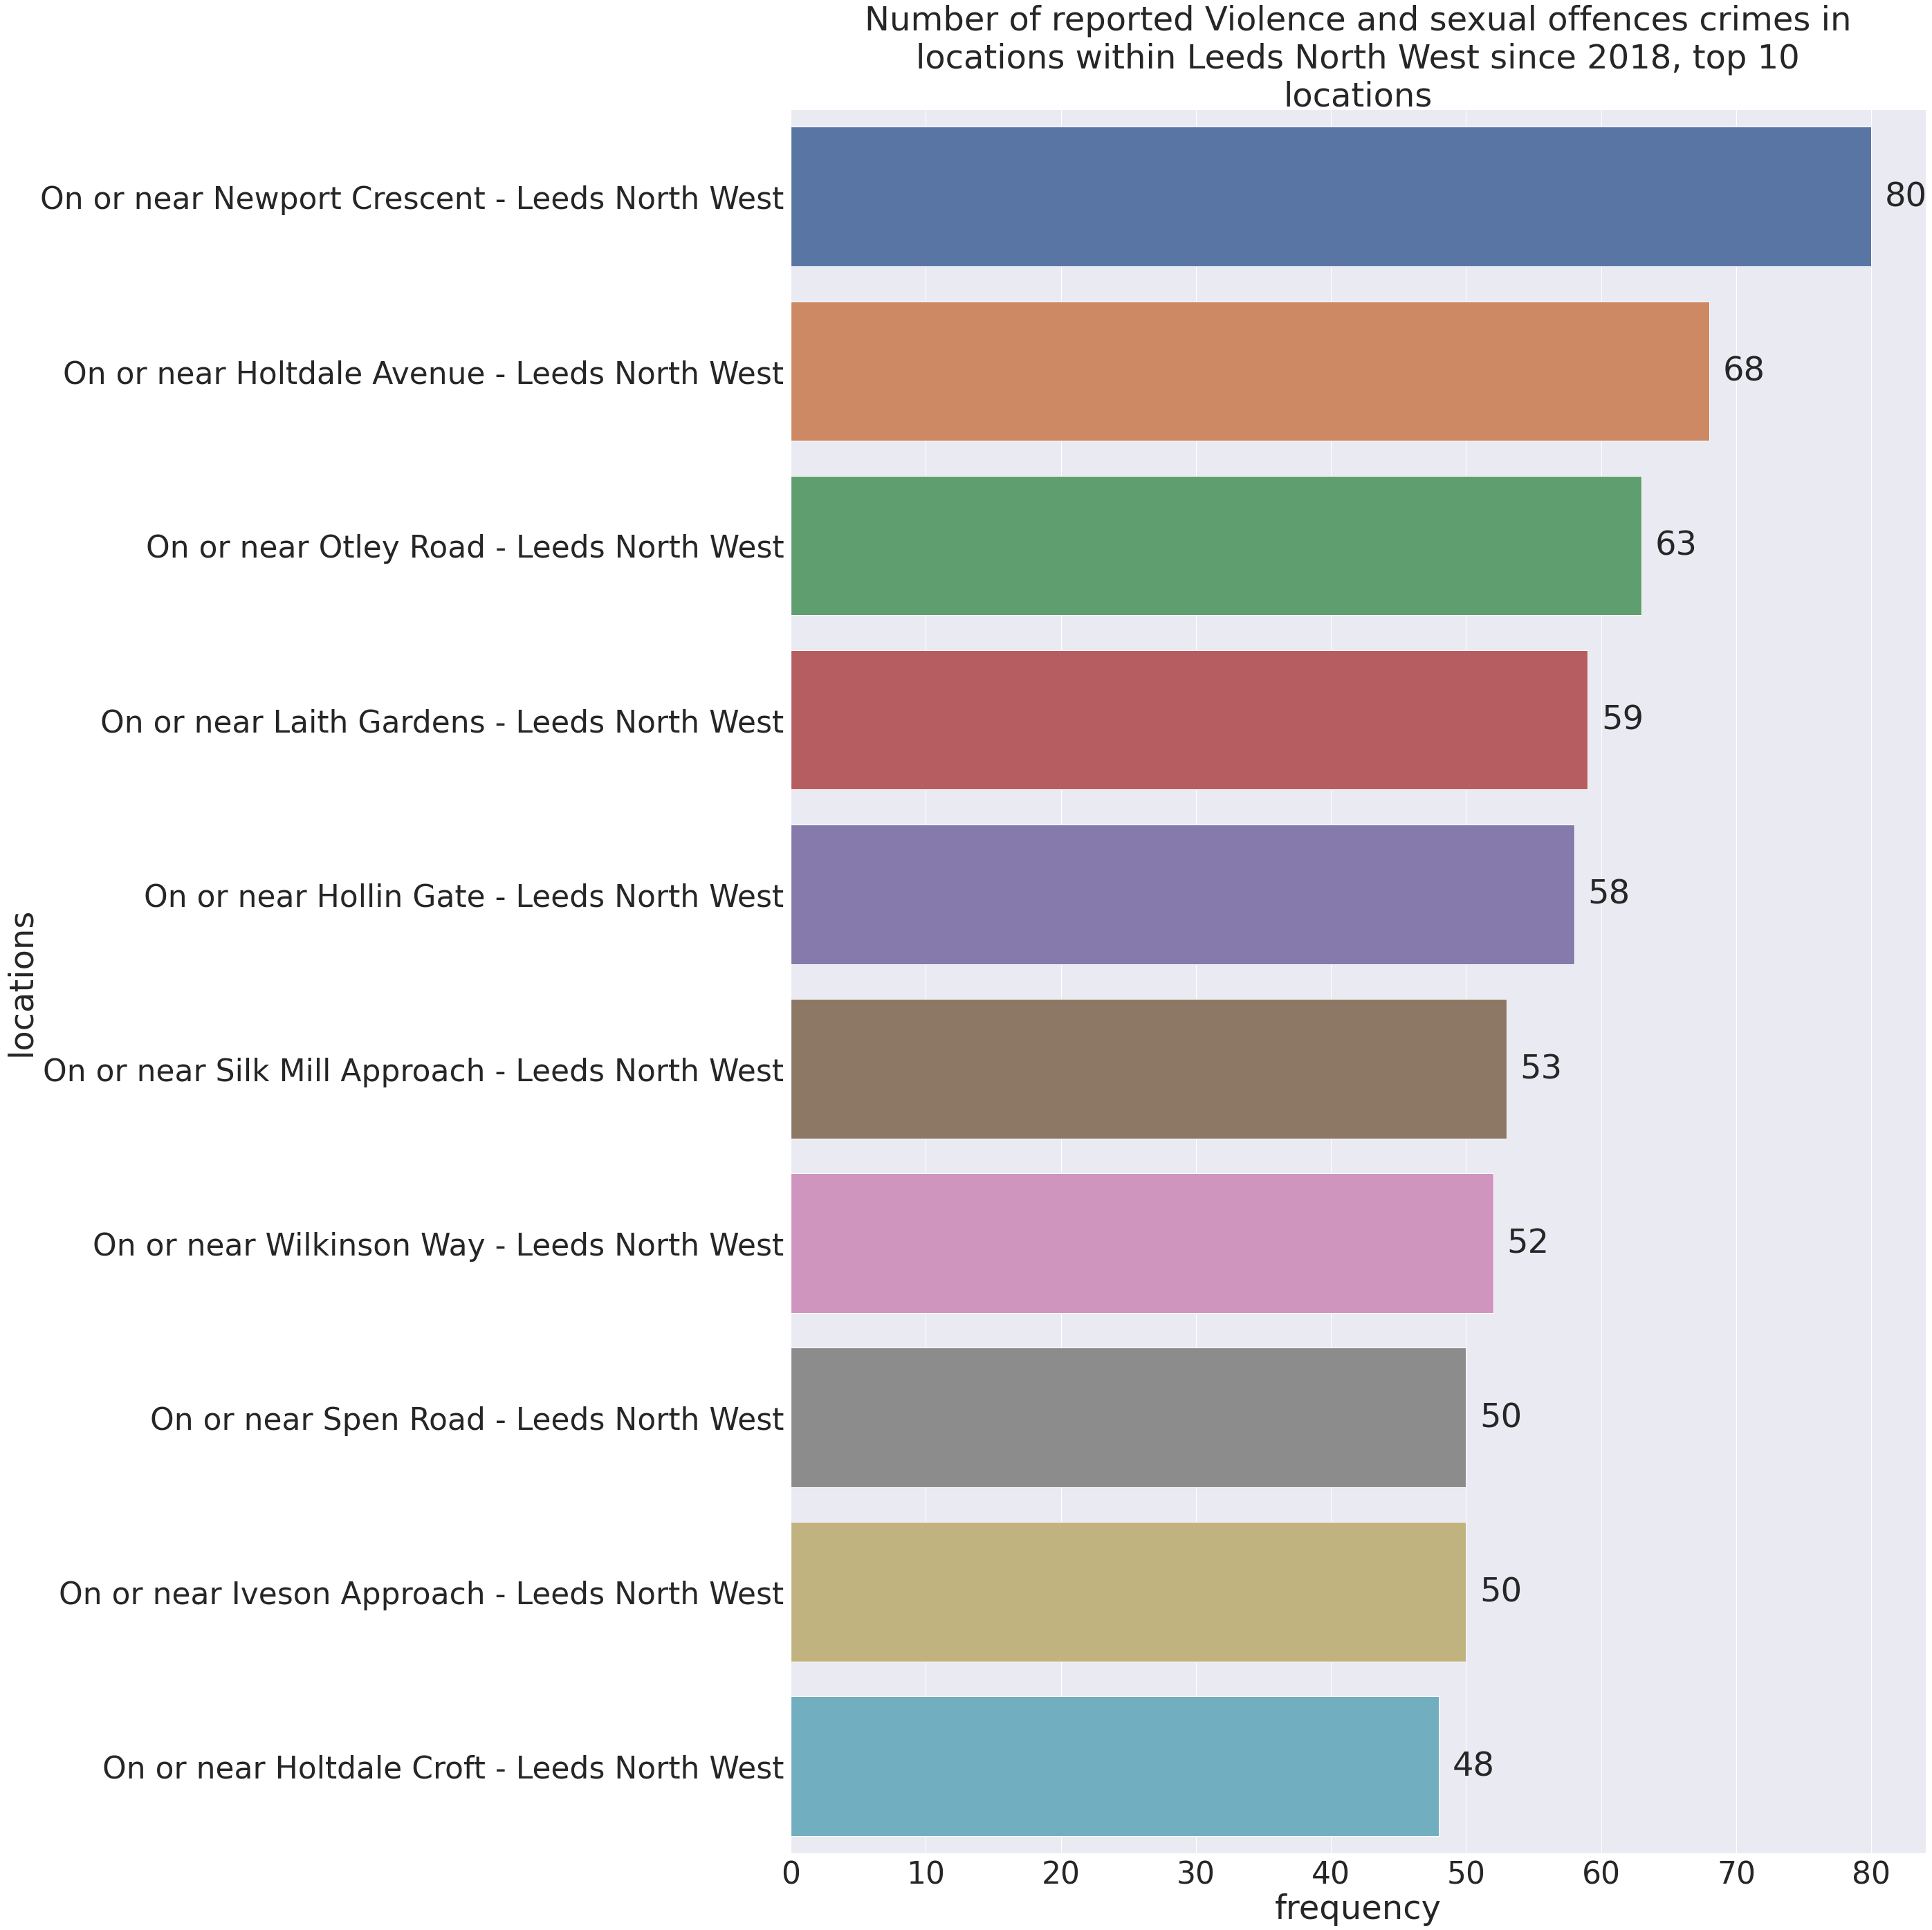

In [29]:
data.hotspots_graph(location = "Leeds North West", top = 10)

If you wish to present the data in a custom manner access the hotspots data directly. If you run the graph with the top variable set to `None` you will get the data for all the locations.

In [30]:
data.hotspots

,locations,frequency
0,On or near Newport Crescent - Leeds North West,80
1,On or near Holtdale Avenue - Leeds North West,68
2,On or near Otley Road - Leeds North West,63
3,On or near Laith Gardens - Leeds North West,59
4,On or near Hollin Gate - Leeds North West,58
5,On or near Silk Mill Approach - Leeds North West,53
6,On or near Wilkinson Way - Leeds North West,52
7,On or near Spen Road - Leeds North West,50
8,On or near Iveson Approach - Leeds North West,50
9,On or near Holtdale Croft - Leeds North West,48


If you want to use the data in another program such as excel you can export the entire downloaded dataset to a CSV file

In [31]:
data.export('test.csv', 'csv')

And to write to a SPSS .sav file

In [32]:
data.export('test.sav', 'sav')

# Conclusion

I hope this program has helped demonstrate the capabilities of the module. If you spotted any bugs, feature imporvements or areas for optimisation free to raise an issue or submit a pull request.